In [0]:
import random
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [0]:
# For some reason, probabilities don't make sense for some settings.
# env = RockPaperScissors(1/3, 1/3+epsilon, 1/3-epsilon) -- ~ 0/80/20 split
# env = RockPaperScissors(1/3, 1/3-epsilon, 1/3+epsilon) -- ~ 100/0/0 split
class RockPaperScissors():
  def __init__(self, p_rock, p_paper, p_scissors):
    # 0: rock, 1: paper, 2:scissors
    t = p_rock + p_paper + p_scissors
    self.p_rock = p_rock / t
    self.p_paper = p_paper / t
    self.p_scissors = p_scissors / t
    print([0,self.p_rock],[self.p_rock,self.p_rock + self.p_paper])
    # print(self.p_rock, self.p_paper, self.p_scissors)
    
  def play(self, a):
    r = 0
    s = 0
    
    k = random.uniform(0,1)
    if 0 <= k <= self.p_rock:
      m = 0
    elif self.p_rock <= k <= (self.p_rock + self.p_paper):
      m = 1
    else:
      m = 2
      
    if (a-m) % 3 == 1:
      r = 1
    elif (m-a) % 3 == 1:
      r = -1
    
    return s, r, 1, 1
  
  def reset(self):
    return 0

In [216]:
# Probability of playing rock/paper/scissors
# env = RockPaperScissors(0.5, 0.25, 0.25)
epsilon = 1e-1
print(1/3+epsilon)
env = RockPaperScissors(1/3, 1/3+epsilon, 1/3-epsilon)

0.43333333333333335
[0, 0.33333333333333337] [0.33333333333333337, 0.7666666666666668]


In [0]:
def simulate():
  #Initialize table with all zeros
  Q = np.zeros([1,3])
  # Set learning parameters
  lr = .8
  y = .95
  num_episodes = 2500
  #create lists to contain total rewards and steps per episode
  #jList = []
  rList = []; aList = []
  for i in range(num_episodes):
      #Reset environment and get first new observation
      s = env.reset()
      rAll = 0

      #The Q-Table learning algorithm
      #Choose an action by greedily (with noise) picking from Q table
      a = np.argmax(Q[s,:] + np.random.uniform(1,3)*(1./(i+1)**0.5))
      #Get new state and reward from environment
      s1,r,_,__ = env.play(a)
      #Update Q-Table with new knowledge; all same state (s=0)
      Q[s,a] = Q[s,a] + lr*(r + y*np.max(Q[s,:]) - Q[s,a]) # not sure if this line is correct, since only one state now.
      rAll += r

      rList.append(rAll)
      aList.append(a)
      
  return Q, rList, aList
Q, rList, aList = simulate()

In [130]:
print("Score over time: ", str(sum(rList)/num_episodes))
print("Final Q-Table Values:")
print(Q)

Score over time:  0.0088
Final Q-Table Values:
[[-0.9029037  -7.28814648 -7.29544691]]


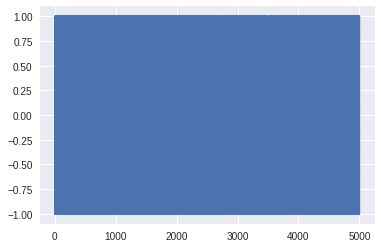

In [131]:
plt.plot(rList)

In [132]:
print(aList[:200])
print(aList[200:400])
print(aList[4800:])

print(aList.count(0), aList.count(1), aList.count(2))

[1, 1, 2, 1, 2, 2, 2, 0, 0, 2, 2, 2, 2, 2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 2, 0, 0, 0, 0, 0, 0, 2, 2, 1, 1, 2, 0, 0, 0, 2, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1]
[1, 1, 1, 1, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 2, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,

In [218]:
M = [0,0,0]
for i in range(100):
  Q, rList, aList = simulate()
  A = [aList.count(0), aList.count(1), aList.count(2)]
  m = A.index(max(A))
  print(m, ':', A, end=' ')
  if (i+1) % 10 == 0:
    print()
  M[m] += 1
print()
print(M)

2 : [63, 326, 2111] 1 : [54, 2002, 444] 1 : [19, 2397, 84] 1 : [74, 2417, 9] 1 : [50, 1673, 777] 1 : [76, 1791, 633] 1 : [16, 2418, 66] 1 : [26, 2421, 53] 1 : [17, 1604, 879] 1 : [78, 2299, 123] 
1 : [146, 2187, 167] 2 : [101, 668, 1731] 2 : [29, 263, 2208] 1 : [9, 2249, 242] 1 : [7, 2442, 51] 1 : [51, 1718, 731] 1 : [132, 2210, 158] 1 : [16, 2412, 72] 2 : [193, 340, 1967] 1 : [12, 2127, 361] 
1 : [22, 1545, 933] 1 : [39, 2190, 271] 2 : [43, 1149, 1308] 1 : [64, 2078, 358] 1 : [42, 2163, 295] 1 : [41, 1576, 883] 1 : [84, 1746, 670] 1 : [39, 1235, 1226] 2 : [31, 674, 1795] 2 : [8, 937, 1555] 
1 : [10, 2091, 399] 1 : [31, 2002, 467] 2 : [29, 1031, 1440] 1 : [7, 1509, 984] 1 : [19, 2111, 370] 2 : [18, 826, 1656] 1 : [33, 2440, 27] 1 : [29, 1733, 738] 2 : [96, 347, 2057] 1 : [84, 2045, 371] 
1 : [9, 2331, 160] 1 : [54, 2254, 192] 1 : [15, 1516, 969] 1 : [27, 1917, 556] 1 : [7, 2341, 152] 1 : [24, 1372, 1104] 2 : [21, 1217, 1262] 1 : [33, 2273, 194] 1 : [31, 2340, 129] 2 : [36, 316, 2148] 
